In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [2]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [4]:
X = df.drop(['total'], axis =1)
y = df['total']

In [5]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [6]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [9]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 55.7146 - val_loss: 22.7501
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 22.3116 - val_loss: 22.0150
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.2575 - val_loss: 22.0200
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.3384 - val_loss: 22.3044
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 22.1909 - val_loss: 21.9303
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.2476 - val_loss: 22.2667
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 22.0914 - val_loss: 21.8359
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 22.1671 - val_loss: 22.0158
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.0593 - val_loss: 21.7989
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 22.0329 - val_loss: 21.8071
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 22.0300 - val_loss: 21.7948
Epoch 12/50
832/832 ━━━━━━━━━

<Axes: >

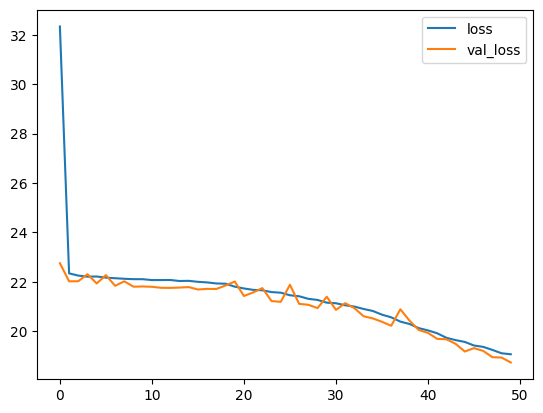

In [10]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [11]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


19.220477136011006

In [18]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

# Styling for widgets
style = {'description_width': '150px'}
layout = widgets.Layout(width='50%')

# Dropdown widgets for user inputs
venue = widgets.Dropdown(
    options=df['venue'].unique().tolist(),
    description='Select Venue:',
    style=style,
    layout=layout
)
batting_team = widgets.Dropdown(
    options=df['bat_team'].unique().tolist(),
    description='Select Batting Team:',
    style=style,
    layout=layout
)
bowling_team = widgets.Dropdown(
    options=df['bowl_team'].unique().tolist(),
    description='Select Bowling Team:',
    style=style,
    layout=layout
)
striker = widgets.Dropdown(
    options=df['batsman'].unique().tolist(),
    description='Select Striker:',
    style=style,
    layout=layout
)
bowler = widgets.Dropdown(
    options=df['bowler'].unique().tolist(),
    description='Select Bowler:',
    style=style,
    layout=layout
)

# Button widget for prediction
predict_button = widgets.Button(
    description="Predict Score",
    button_style='success',  # Options: 'primary', 'success', 'info', 'warning', 'danger'
    tooltip='Click to predict the score',
    icon='line-chart'  # Optional icon for visual enhancement
)

# Output widget for displaying results
output = widgets.Output()

# Header for the interface
header = widgets.HTML(
    "<h2 style='color: navy;'>Cricket Score Predictor</h2>"
    "<p>Select the parameters below and click 'Predict Score' to get the result.</p>"
)

# Function to handle prediction logic
def predict_score(button):
    with output:
        clear_output()  # Clear the previous output

        # Decode the selected values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])

        # Prepare input data for prediction
        input_data = np.array([
            decoded_venue,
            decoded_batting_team,
            decoded_bowling_team,
            decoded_striker,
            decoded_bowler
        ])
        input_data = input_data.reshape(1, -1)
        input_data = scaler.transform(input_data)

        # Predict and display the score
        predicted_score = model.predict(input_data)
        predicted_score = int(predicted_score[0, 0])

        # Display the prediction in a styled format
        display(widgets.HTML(
            f"<h3 style='color: green;'>Predicted Score: {predicted_score}</h3>"
        ))

# Attach the click event to the predict button
predict_button.on_click(predict_score)

# Layout arrangement
inputs = widgets.VBox([venue, batting_team, bowling_team, striker, bowler], layout=widgets.Layout(align_items='center'))
main_layout = widgets.VBox([header, inputs, predict_button, output], layout=widgets.Layout(align_items='center'))

# Display the complete UI
display(main_layout)
